In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_data = pd.read_csv('test_cleaned.csv')

In [8]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57.0,retired,married,secondary,no,718.0,no,no,cellular,3,jun,170.0,1.0,-1.0,0.0,unknown
1,50.0,management,married,secondary,no,268.0,no,no,cellular,3,jun,74.0,2.0,90.0,2.0,failure
2,46.0,technician,single,secondary,no,889.0,yes,no,cellular,3,jun,65.0,1.0,96.0,1.0,failure
3,56.0,admin.,married,secondary,no,3554.0,no,no,cellular,3,jun,151.0,1.0,-1.0,0.0,unknown
4,32.0,services,single,tertiary,no,785.0,no,no,cellular,3,jun,273.0,1.0,-1.0,0.0,unknown


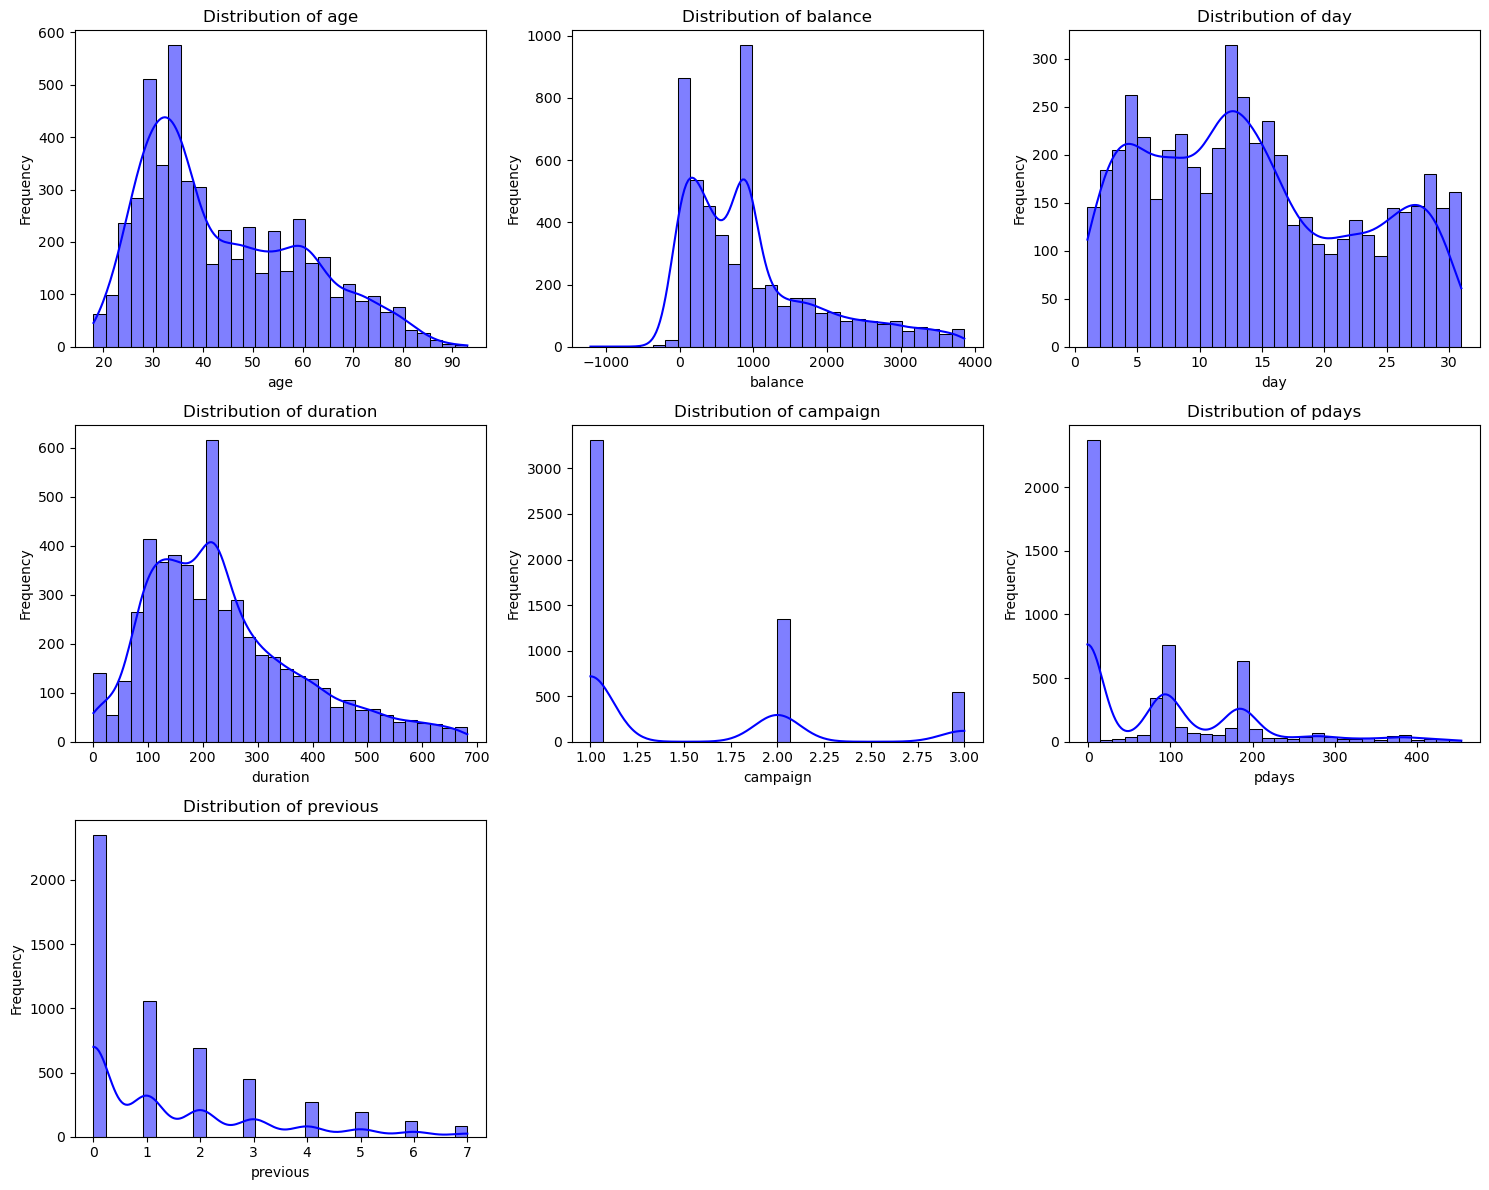

In [29]:
# Distribution of Numerical Columns in Subplots
numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)  
cols = 3  
rows = -(-num_cols // cols) 
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(test_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

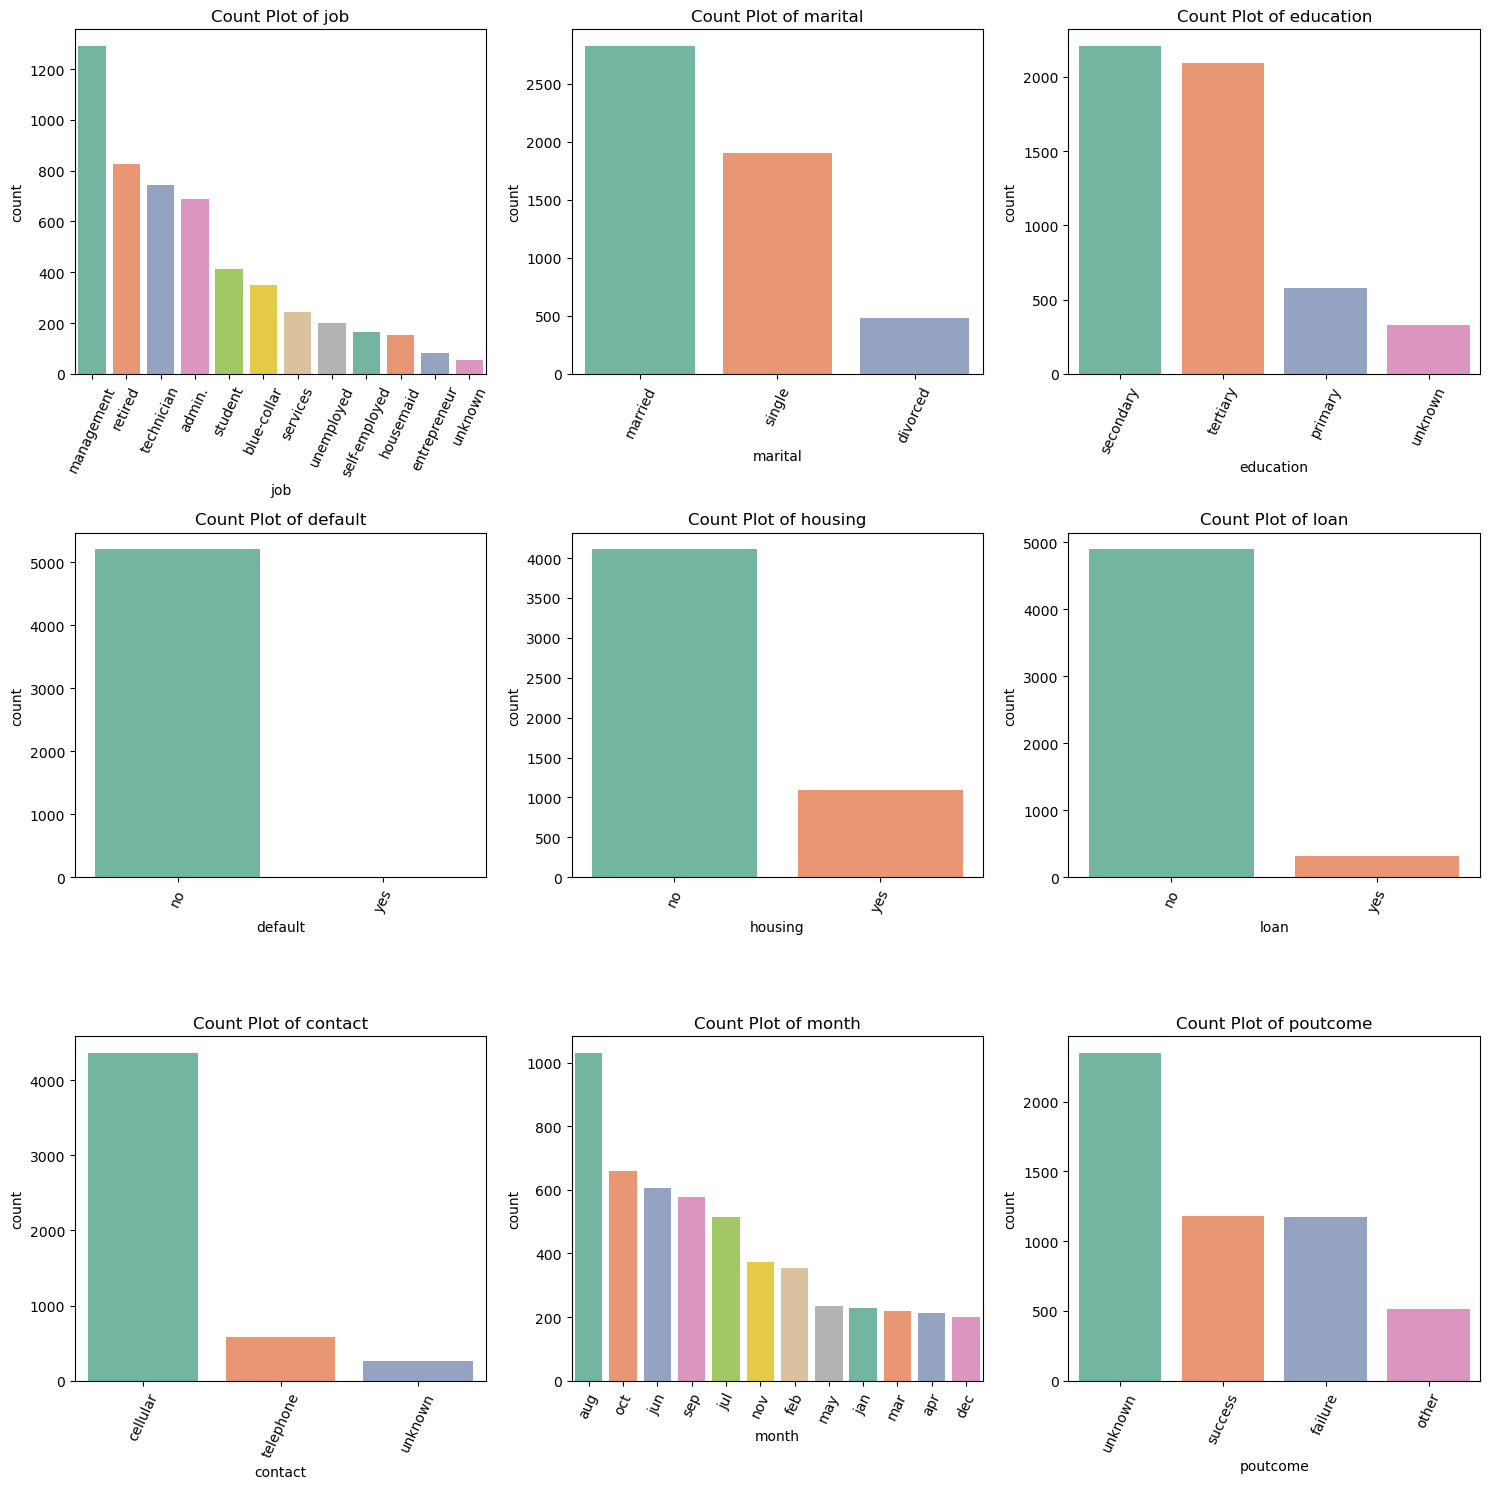

In [30]:
# Visualization for Categorical Columns
categorical_cols = test_data.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
cols = 3  
rows = (num_cols // cols) + (1 if num_cols % cols != 0 else 0) 

# Create the figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(data=test_data, x=col, order=test_data[col].value_counts().index, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=65) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



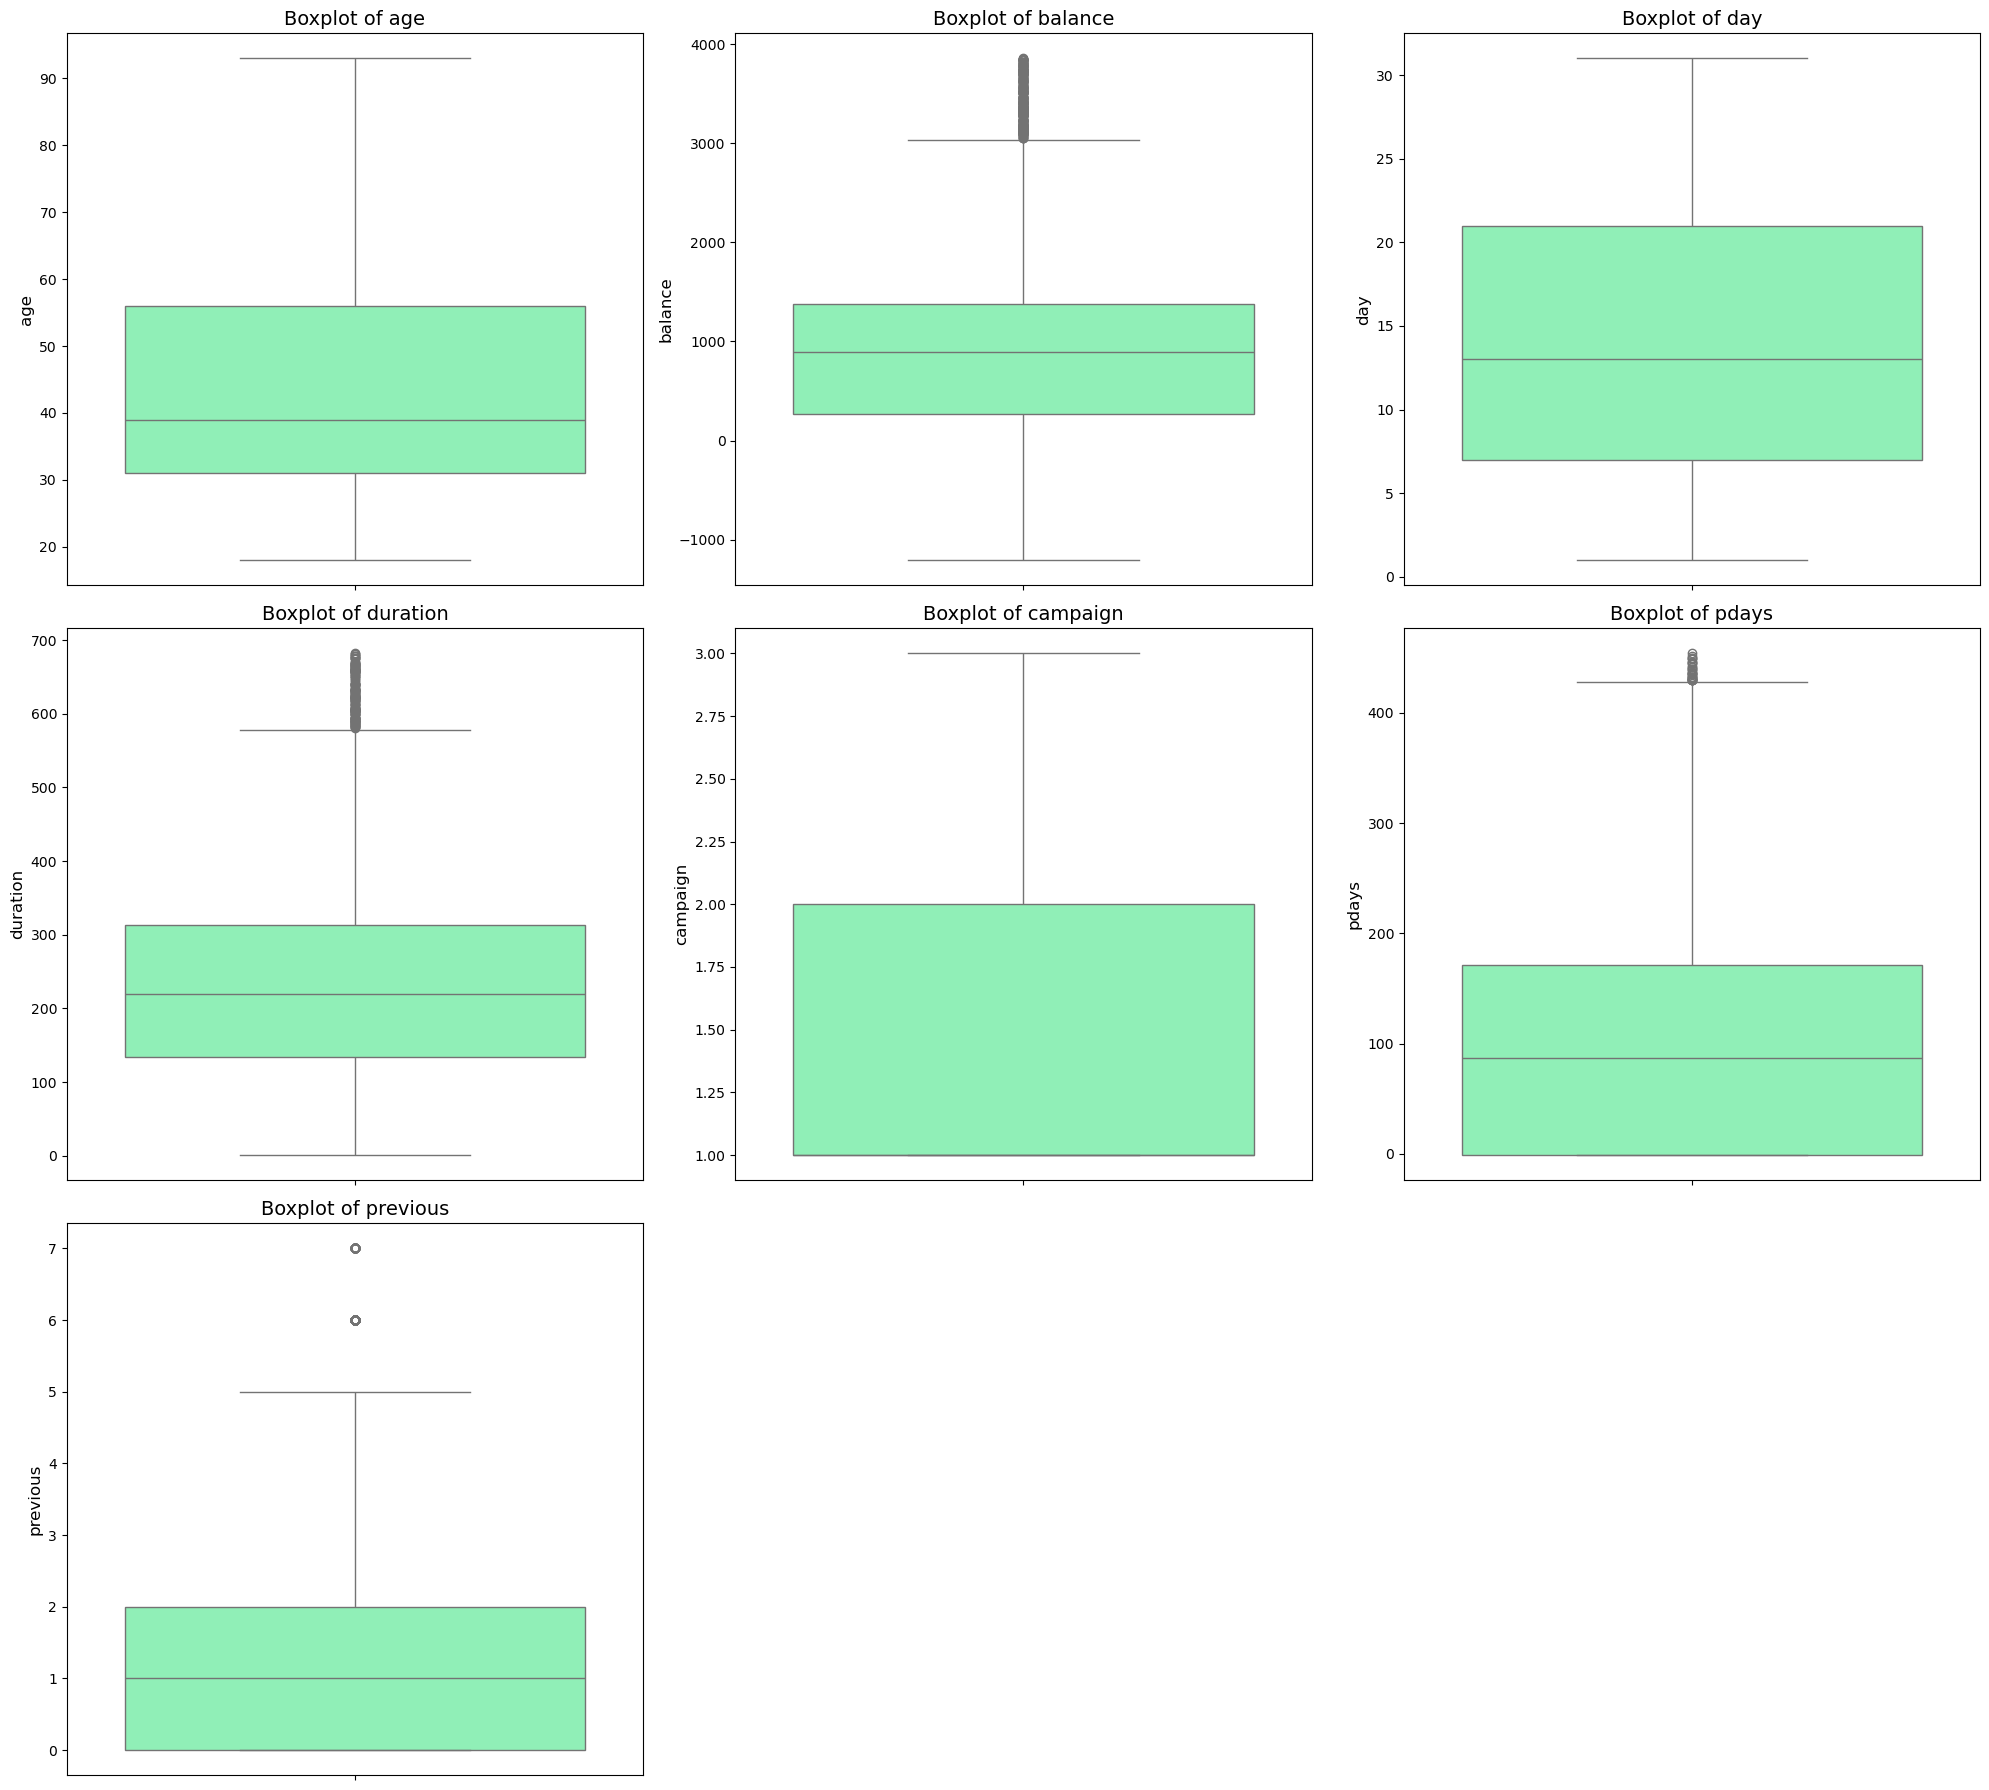

In [35]:
# boxplot visualization for  numerical columns
numerical_cols = test_data.select_dtypes(include=['number']).columns


num_cols_count = len(numerical_cols)
rows = (num_cols_count // 3) + (num_cols_count % 3 > 0)  

fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 6))
axes = axes.flatten()  

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=test_data, y=col, ax=axes[i], palette='rainbow')
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col, fontsize=12)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


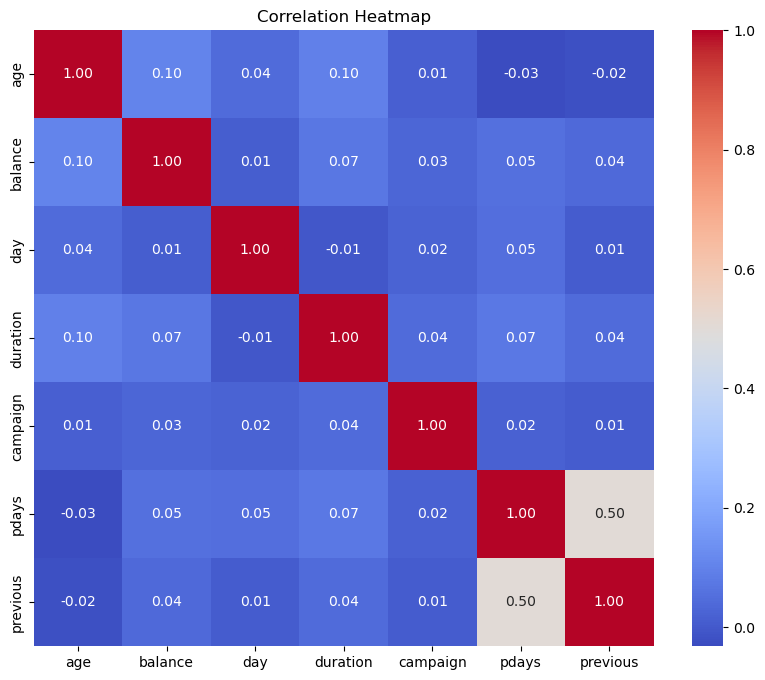

In [37]:
# Correlation Heatmap
numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = test_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

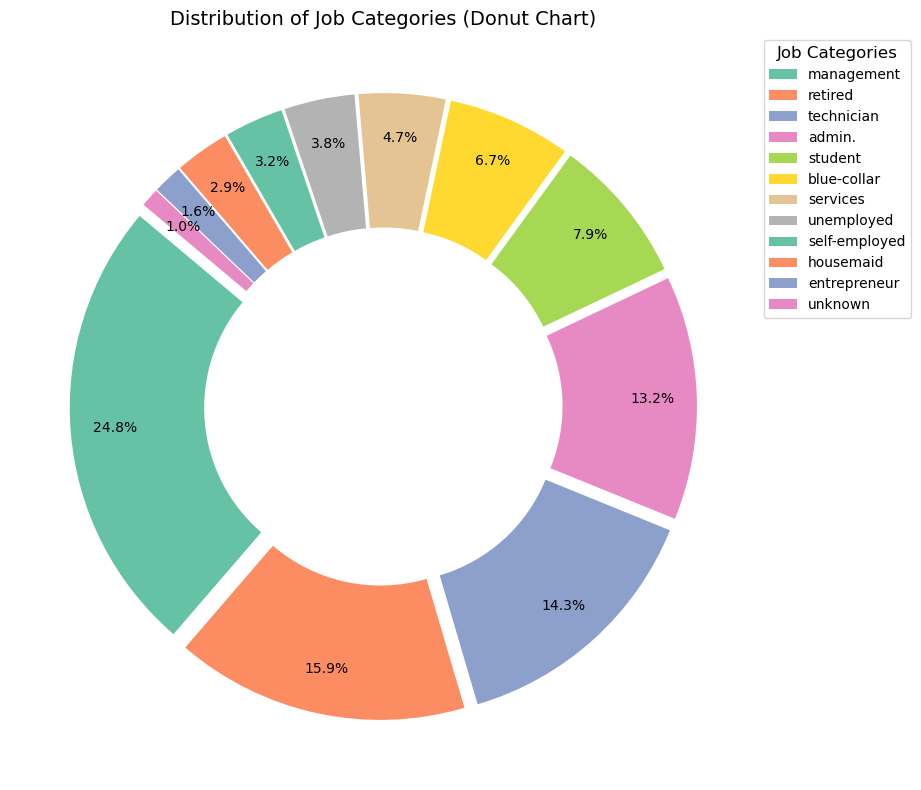

In [38]:
# Count the values for the job column
job_counts = test_data['job'].value_counts()

# Plot the donut chart
plt.figure(figsize=(10, 8))
colors = plt.cm.Set2.colors[:len(job_counts)]
explode = [0.05] * len(job_counts)  # Slightly separate each slice

plt.pie(
    job_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.45},
    explode=explode,
    pctdistance=0.85  # Position percentages closer to the center
)


# Add title and legend
plt.title("Distribution of Job Categories (Donut Chart)", fontsize=14)
plt.legend(
    job_counts.index,
    title="Job Categories",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=10,
    title_fontsize=12
)

# Display the chart
plt.tight_layout()
plt.show()